In [2]:
using Pkg
#Pkg.add("Distributions")
using Distributions
using PyPlot

In [3]:
#coordination game

#player, action 1, action 2
payoffs = [ [3 0 ; 0 1], [1 0 ; 0 3] ]

#player, action (not yours)
priors = [1 1 ; 1 1]

function simulate_game(payoffs,beliefs;T=10,update=true)
    
    #infer # of players and actions
    players = 2
    actions = 2
    trial = zeros(T,players)
    beliefs = beliefs[:,:]
    for t =1:T
        choices = []
        for k=1:players
            expected_payoffs = []
            for i=1:actions
                belief_t = beliefs[k,:]/sum(beliefs[k,:])
                payoff = sum( belief_t .* payoffs[k][i,:]) + rand(Gumbel())
                append!(expected_payoffs,payoff)
            end
            append!(choices,argmax(expected_payoffs))
        end
        for k=1:players
            if choices[k]==1
                trial[t,k] = 1
            end
            
            if update
                not_k = mod(k,2)+1
                beliefs[k,choices[not_k]] = beliefs[k,choices[not_k]] +1
            end
        end
    end
    
    return trial
end

print(simulate_game(payoffs,priors))

print(priors)

(10, 2)

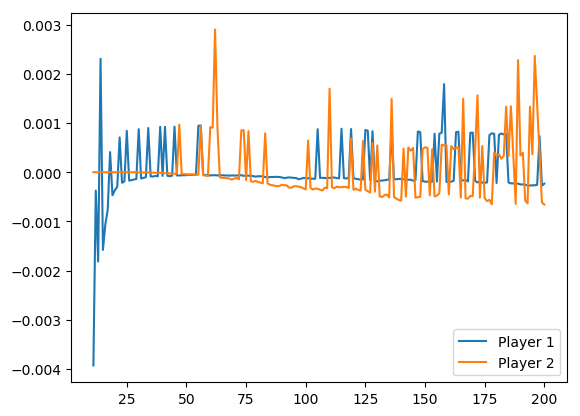

PyObject <matplotlib.legend.Legend object at 0x7fc5f20b7b70>

In [41]:
#different lag

L = 10
N =1000
T= 200

#player, action 1, action 2
payoffs = [ [-1 1 ; 1 -1], [1 -1 ; -1 1] ]
#payoffs = [ [3 0 ; 0 1], [1 0 ; 0 3] ]

#player, action (not yours)
priors = [10 0 ; 10 0]

data= zeros(N,T,2)

for i=1:N
   data[i,:,:] = simulate_game(payoffs,priors;T=T)
end


corr = zeros(T-L,2)
for p=1:2
    not_p = mod(p,2)+1
    for t=1:(T-L)
        corr_t = data[:,t+L,p]
        ecorr_t = sum(data[:,t+L,p])/N
        for l=0:(L-1)
            corr_t= data[:,t+l,not_p] .* corr_t
            ecorr_t = ecorr_t * sum(data[:,t+l,not_p])/N
        end
        corr[t,p] = sum(corr_t)/N - ecorr_t
    end
    plot( collect(L+1:T), corr[:,p], label="Player $(p)" )
end


legend()